# Simple Deep Neural Network

## Import libraries

In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

from dnn_utils import *
from utils import load_catvnoncat_dataset
from test_cases import *

%load_ext autoreload
%autoreload 2 

SEED = 1
np.random.seed(SEED)

## Data processing

In [2]:
train_set_x, train_Y, test_set_x, test_Y, classes = load_catvnoncat_dataset()

y = non-cat, It is a non-cat


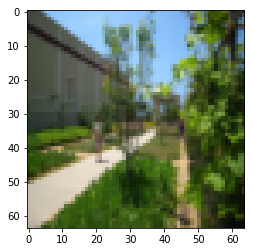

In [3]:
index = 8
plt.imshow(train_set_x[index])
print("y = {}, It is a non-cat".format(classes[train_Y[0, index]].decode("utf-8")))

In [4]:
m_train = train_set_x.shape[0]
num_px = train_set_x.shape[1]
m_test = test_set_x.shape[0]

print("Number of training samples: {}".format(m_train))
print("Number of testing samples: {}".format(m_test))
print("Each image size: ({}, {}) ".format(num_px, num_px))
print("train_set_x_set.shape = {}".format(train_set_x.shape))
print("train_Y.shape = {}".format(test_Y.shape))
print("test_set_x.shape = {}".format(test_set_x.shape))
print("test_Y.shape = {}".format(test_Y.shape))

Number of training samples: 209
Number of testing samples: 50
Each image size: (64, 64) 
train_set_x_set.shape = (209, 64, 64, 3)
train_Y.shape = (1, 50)
test_set_x.shape = (50, 64, 64, 3)
test_Y.shape = (1, 50)


### Flate and normalization

In [5]:
train_x_flatten = train_set_x.reshape(train_set_x.shape[0], -1).T
test_x_flatten = test_set_x.reshape(test_set_x.shape[0], -1).T

train_X = train_x_flatten / 255.
test_X = test_x_flatten / 255.
print("train_X.shape = {}".format(train_X.shape))
print("test_X.shape = {}".format(test_X.shape))

train_X.shape = (12288, 209)
test_X.shape = (12288, 50)


## Build a deep neural network

### Initialize parameters

In [6]:
def initialize_parameters_deep(layer_dims):
    """
    Arguments:
    layer_dims - data type is python list that containing the dimensions of each layer.
    
    Returns:
    params - data type is python dictionary that containing "W1", "b1", "W2", "b2", ..., and W[len(layer_dims)-1], b[len(layer_dims)-1]:
        W1 is matrix, size is (layer_dims[n], layer_dims[n-1])
        b1 is vector, size is (layer_dims[n], 1)
    """
    params = {}
    L = len(layer_dims)
    
    for l in range(1, L):
        params["W" + str(l)] = np.random.randn(layer_dims[l], layer_dims[l - 1]) / np.sqrt(layer_dims[l - 1])
        params["b" + str(l)] = np.zeros((layer_dims[l], 1))
    
    return params

In [7]:
params = initialize_parameters_deep([5, 4, 2])
print("W1 = {}".format(params["W1"]))
print("b1 = {}".format(params["b1"]))
print("W2 = {}".format(params["W2"]))
print("b2 = {}".format(params["b2"]))

W1 = [[ 0.72642933 -0.27358579 -0.23620559 -0.47984616  0.38702206]
 [-1.0292794   0.78030354 -0.34042208  0.14267862 -0.11152182]
 [ 0.65387455 -0.92132293 -0.14418936 -0.17175433  0.50703711]
 [-0.49188633 -0.07711224 -0.39259022  0.01887856  0.26064289]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.55030959  0.57236185  0.45079536  0.25124717]
 [ 0.45042797 -0.34186393 -0.06144511 -0.46788472]]
b2 = [[0.]
 [0.]]


### Forward propagation

In [8]:
def linear_forward(A_prev, W, b):
    """
    Arguments:
    A_prev - data type is numpy array, activations from previous layer, shape is (size of previous layer, number of samples)
    W - data type is numpy array, weight matrix, shape is (size of current layer, size of previous layer)
    b - data type is numpy array, bias vector, shape is (size of current layer, 1)
    
    Returns:
    Z - the input of the activation function
    cache - data type tuple, containing "A_prev", "W" and "b"
    """
    Z = W.dot(A_prev) + b
    cache = (A_prev, W, b)
    return Z, cache

In [9]:
A, W, b = linear_forward_test_case()
Z, linear_cache = linear_forward(A, W, b)
print("Z = {}".format(Z))

Z = [[ 3.26295337 -1.23429987]]


In [10]:
def linear_activation_forward(A_prev, W, b, activation):
    """
    Arguments:
    A_prev - data type is numpy array, activations from previous layer, shape is (size of previous layer, number of samples)
    W - data type is numpy array, weight matrix, shape is (size of current layer, size of previous layer)
    b - data type is numpy array, bias vector, shape is (size of current layer, 1)
    activation - the activation to be used in this layer (sidmoid or relu)
    
    Returns:
    A - data type is numpy array, the output of the activation function, shape same as A_prev
    cache - data is python dictionary that containing "linear cache" and "activation_cache".
    """
    Z, linear_cache = linear_forward(A_prev, W, b)
    if activation == "sigmoid":
        A, activation_cache = sigmoid(Z)
    else:
        A, activation_cache = relu(Z)
        
    cache = (linear_cache, activation_cache)
    return A, cache

In [11]:
A_prev, W, b = linear_activation_forward_test_case()

A, linear_activation_cache = linear_activation_forward(A_prev, W, b, activation = "sigmoid")
print("With sigmoid: A = {}".format(A))

A, linear_activation_cache = linear_activation_forward(A_prev, W, b, activation = "relu")
print("With ReLU: A = {}".format(A))

With sigmoid: A = [[0.96890023 0.11013289]]
With ReLU: A = [[3.43896131 0.        ]]


In [12]:
def deep_model_forward(X, params):
    """
    Arguments:
    X - data type is numpy array, input data, shape is (input size, number of samples)
    params - output of initialize_parameters_deep function
    
    Returns:
    A_last - data type is numpy array, last layer activation
    caches - data type is python list that containing:
        every cache of linear_activation_forward
    """
    caches = []
    A = X
    L = len(params) // 2 # number of layers in the model
    
    for l in range(1, L):
        A_prev = A
        A, cache = linear_activation_forward(A_prev, params["W" + str(l)], params["b" + str(l)], activation="relu")
        caches.append(cache)
    
    A_last, cache = linear_activation_forward(A, params["W" + str(L)], params["b" + str(L)], activation="sigmoid")
    caches.append(cache)
    return A_last, caches

In [13]:
X, params = deep_model_forward_test_case_2hidden()
A_last, caches = deep_model_forward(X, params)
print("A_last = {}".format(A_last))
print("Length of caches list = {}".format(len(caches)))

A_last = [[0.03921668 0.70498921 0.19734387 0.04728177]]
Length of caches list = 3


### Compute cost

In [14]:
def compute_cost(A_last, Y):
    """
    Arguments:
    A_last - data type is numpy array, probability vecotr corresponds to label, shape is (1, number of samples)
    Y - data type is numpy array, true "label" vector, shape is (1, number of samples)
    
    Returns:
    cost - cross-entropy cost
    """
    m = Y.shape[1]
    
    cost = (1./m) * (-np.dot(Y, np.log(A_last).T) - np.dot(1-Y, np.log(1 - A_last).T))
    cost = np.squeeze(cost)
    return cost

In [15]:
Y, AL = compute_cost_test_case()
cost = compute_cost(AL, Y)
print("Cost = {}".format(cost))

Cost = 0.41493159961539694


### Backward propagation

In [16]:
def linear_backward(dZ, cache):
    """
    Arguments:
    dZ - data type is numpy array, gradient of the cost with respect to the linear output
    cache -- data type is python tuple, containing A_prev, W and b, coming from the forward progagation in the current layer,
    
    Returns:
    dA_prev - data type is numpy array, gradient of the cost with respect to the activation, same shape as A_prev
    dW - data type is numpy array, gradient of the cost with respect to current layer's weight matrix, shape same as W
    db - data type is numpy array, gradient of the cost with respect to current layer's bias vector, shape same as b
    """
    A_prev, W, b = cache
    m = A_prev.shape[1]
    
    dW = (1. / m) * np.dot(dZ, A_prev.T)
    db = (1. / m) * np.sum(dZ, axis=1, keepdims=True)
    dA_prev = np.dot(W.T, dZ)
    
    return dA_prev, dW, db

In [17]:
dZ, linear_cache = linear_backward_test_case()

dA_prev, dW, db = linear_backward(dZ, linear_cache)
print ("dA_prev = {}".format(dA_prev))
print ("dW = {}".format(dW))
print ("db = {}".format(db))

dA_prev = [[ 0.51822968 -0.19517421]
 [-0.40506361  0.15255393]
 [ 2.37496825 -0.89445391]]
dW = [[-0.10076895  1.40685096  1.64992505]]
db = [[0.50629448]]


In [18]:
def linear_activation_backward(dA, caches, activation):
    """
    Arguments:
    dA - data type is numpy array, activation gradient for current layer
    caches - data type is pyton tuple, store linear_cache and activation_cache
    activation - data type is string, the activation to be used in this layer (sigmoid or relu)
    
    Returns:
    dA_prev - data type is numpy array, gradient of the cost with respect to the activation of the previous layer, shape same as A_prev
    dW - data type is numpy array, gradient of the cost with respect to current layer's weights, shape same as W
    db - data type is numpy array, gradient of the cost with respect to current layer's bias, shape same as b
    """
    linear_cache, activation_cache = caches
    
    if activation == "sigmoid":
        dZ = sigmoid_derivative(dA, activation_cache)
    elif activation == "relu":
        dZ = relu_derivative(dA, activation_cache)  
    
    dA_prev, dW, db = linear_backward(dZ, linear_cache)
       
    return dA_prev, dW, db

In [19]:
A_last, linear_activation_cache = linear_activation_backward_test_case()

dA_prev, dW, db = linear_activation_backward(A_last, linear_activation_cache, activation = "sigmoid")
print ("sigmoid:")
print ("dA_prev = {}".format(dA_prev))
print ("dW = {}".format(dW))
print ("db = {}\n".format(db))

dA_prev, dW, db = linear_activation_backward(A_last, linear_activation_cache, activation = "relu")
print ("relu:")
print ("dA_prev = {}".format(dA_prev))
print ("dW = {}".format(dW))
print ("db = {}".format(db))

sigmoid:
dA_prev = [[ 0.11017994  0.01105339]
 [ 0.09466817  0.00949723]
 [-0.05743092 -0.00576154]]
dW = [[ 0.10266786  0.09778551 -0.01968084]]
db = [[-0.05729622]]

relu:
dA_prev = [[ 0.44090989  0.        ]
 [ 0.37883606  0.        ]
 [-0.2298228   0.        ]]
dW = [[ 0.44513824  0.37371418 -0.10478989]]
db = [[-0.20837892]]


In [20]:
def deep_model_backward(A_last, Y, caches):
    """
    Arguments:
    A_last - data type is numpy array, probability vector, output of the forward propagation 
    Y - data type is numpy array, true "label" vector
    caches - data type is python list, containting:
        every cache of linear_activation_forward() with "relu" (layer index from 0 - L - 2)
        the cache of linear_activation_forward() with "sigmoid" (layer index is L - 1)
        
    Returns:
    grads - data type is ptyon  dictionary, containing:
        every layer's dA, dW, db
    """
    grads = {}
    L = len(caches)
    m = A_last.shape[1]
    Y = Y.reshape(A_last.shape)
    
    dA_last = -(np.divide(Y, A_last) - np.divide(1 - Y, 1 - A_last))
    current_cache = caches[L - 1]
    grads["dA" + str(L)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dA_last, current_cache, activation="sigmoid")
    
    for l in reversed(range(L - 1)):
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l + 2)], current_cache, activation="relu")
        grads["dA" + str(l + 1)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp
        
    return grads

In [21]:
A_last, Y_assess, caches = deep_model_backward_test_case()
grads = deep_model_backward(A_last, Y_assess, caches)
print("dW1 = {}".format(grads["dW1"]))
print("db1 = {}".format(grads["db1"]))
print("dA1 = {}".format(grads["dA2"]))

dW1 = [[0.41010002 0.07807203 0.13798444 0.10502167]
 [0.         0.         0.         0.        ]
 [0.05283652 0.01005865 0.01777766 0.0135308 ]]
db1 = [[-0.22007063]
 [ 0.        ]
 [-0.02835349]]
dA1 = [[ 0.12913162 -0.44014127]
 [-0.14175655  0.48317296]
 [ 0.01663708 -0.05670698]]


### Update parameters

In [22]:
def update_parameters(params, grads, learning_rate):
    """
    Arguments:
    params - data type is pyton dictionary, containing all parameters
    grads - data type is python dictionary, containing all gradients
    
    Returns:
    params - data type is python dictionary, containing:
        every layer's "W" and "b"
    """

    L = len(params) // 2

    # Update rule for each parameter. Use a for loop.
    for l in range(L):
        params["W" + str(l + 1)] = params["W" + str(l + 1)] - learning_rate * grads["dW" + str(l + 1)]
        params["b" + str(l + 1)] = params["b" + str(l + 1)] - learning_rate * grads["db" + str(l + 1)]
        
    return params

In [23]:
params, grads = update_parameters_test_case()
params = update_parameters(params, grads, 0.1)

print ("W1 = {}".format(params["W1"]))
print ("b1 = {}".format(params["b1"]))
print ("W2 = {}".format(params["W2"]))
print ("b2 = {}".format(params["b2"]))

W1 = [[-0.59562069 -0.09991781 -2.14584584  1.82662008]
 [-1.76569676 -0.80627147  0.51115557 -1.18258802]
 [-1.0535704  -0.86128581  0.68284052  2.20374577]]
b1 = [[-0.04659241]
 [-1.28888275]
 [ 0.53405496]]
W2 = [[-0.55569196  0.0354055   1.32964895]]
b2 = [[-0.84610769]]


### Prediction

In [24]:
def predict(X, y, params):
    """
    Arguments:
    X - dataset of samples
    params - parameters of the trained model
    
    Returns:
    P - predictions for the given dataset X
    """
    m = X.shape[1]
    n = len(params) // 2
    P = np.zeros((1, m))
        
    probas, caches = deep_model_forward(X, params)
    
    for i in range(0, probas.shape[1]):
        if (probas[0, i] > 0.5):
            P[0, i] = 1
        else:
            P[0, i] = 0
            
    return P

### L - layer Neural Network

In [25]:
layers_dims = [12288, 20, 10, 5, 1]

In [26]:
def deep_model(X, Y, layers_dims, learning_rate=0.009, num_iterations=3000, verbose=False):
    costs = []
    params = initialize_parameters_deep(layers_dims)
    
    # for i in range(1, len(params) // 2):
    #    index = str(i)
    #    print("W{}.shape = {}".format(i, params["W" + index].shape))
    #    print("b{}.shape = {}".format(i, params["b" + index].shape))
    
    for i in range(0, num_iterations):
        A_last, caches = deep_model_forward(X, params)
        
        cost = compute_cost(A_last, Y)
        
        grads = deep_model_backward(A_last, Y, caches)
        
        params = update_parameters(params, grads, learning_rate)
                    
        if i % 100 == 0:
            costs.append(cost)
            if verbose:
                print("{} iteration cost: {}".format(i, cost))

    plt.plot(np.squeeze(costs))
    plt.xlabel("Iterations")
    plt.ylabel("Cost")
    plt.title("Learning rate = " + str(learning_rate))
    plt.show()
    return params 

0 iteration cost: 0.695514776145948
100 iteration cost: 0.6162625436022393
200 iteration cost: 0.5578253882241752
300 iteration cost: 0.45573012103576443
400 iteration cost: 0.4075314385054009
500 iteration cost: 0.34753563648299995
600 iteration cost: 0.286314580344321
700 iteration cost: 0.19173655196658834
800 iteration cost: 0.09616852617758465
900 iteration cost: 0.10351671380760358
1000 iteration cost: 0.03937971561617511
1100 iteration cost: 0.024364264407043243
1200 iteration cost: 0.017245088933752598
1300 iteration cost: 0.012911076767801793
1400 iteration cost: 0.01006726945911016
1500 iteration cost: 0.008134688597055276
1600 iteration cost: 0.006730980700455002
1700 iteration cost: 0.005677865337497351
1800 iteration cost: 0.0048788295773509035
1900 iteration cost: 0.004254505316484462
2000 iteration cost: 0.003747357061113971
2100 iteration cost: 0.003334900707207223
2200 iteration cost: 0.0029948225510339236
2300 iteration cost: 0.0027117443708507593
2400 iteration cost:

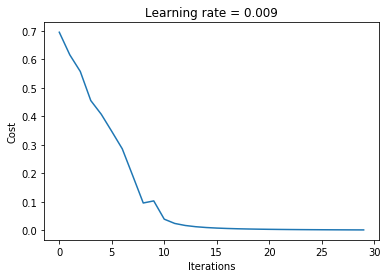

In [27]:
deep_model_params = deep_model(train_X, train_Y, layers_dims, verbose=True)

In [28]:
def print_accuracy(data_type, Y, Y_hat):
    print("{} dataset accuracy: {}".format(data_type, np.sum(np.mean((Y_hat == Y)))))

In [29]:
predictions_train = predict(train_X, train_Y, deep_model_params)
print_accuracy("Train", predictions_train, train_Y)

predictions_test = predict(test_X, test_Y, deep_model_params)
print_accuracy("Test", predictions_test, test_Y)

Train dataset accuracy: 1.0
Test dataset accuracy: 0.78
